In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

2025-02-09 21:27:37.704534: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-09 21:27:38.393180: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-09 21:27:38.926266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-09 21:27:39.145137: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-09 21:27:39.197140: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-09 21:27:39.615334: I tensorflow/core/platform/cpu_feature_gu

In [3]:
df = pd.read_csv("data.csv",index_col ='Tanggal ')


In [4]:
df.corr()

,IHK_UMUM_D_2012,Makanan dan minuman tidak beralkohol,Minuman beralkohol dan tembakau,Pakaian dan alas kaki,"Perumahan, air, listrik, gas, dan bahan bakar lainnya","Furnitur, perlengkapan rumah tangga, dan perbaikan rutin rumah",Kesehatan,Transportasi,Komunikasi,Rekreasi dan kebudayaan,Pendidikan,Penyediaan makan minum dan akomodasi,Barang dan jasa lainnya
IHK_UMUM_D_2012,1.000000,0.978609,0.981891,0.956504,0.977493,0.995540,0.954272,0.954237,0.836590,0.933948,0.943024,0.985507,0.977674
Makanan dan minuman tidak beralkohol,0.978609,1.000000,0.968727,0.914459,0.922370,0.968225,0.910988,0.933907,0.783312,0.889881,0.881469,0.937531,0.976639
Minuman beralkohol dan tembakau,0.981891,0.968727,1.000000,0.963309,0.941911,0.989113,0.957995,0.920227,0.843813,0.939805,0.933476,0.956985,0.984806
Pakaian dan alas kaki,0.956504,0.914459,0.963309,1.000000,0.945435,0.963511,0.978678,0.864902,0.888693,0.980361,0.975549,0.953156,0.958697
"Perumahan, air, listrik, gas, dan bahan bakar lainnya",0.977493,0.922370,0.941911,0.945435,1.000000,0.973607,0.950244,0.914355,0.866432,0.922038,0.964437,0.989988,0.934965
"Furnitur, perlengkapan rumah tangga, dan perbaikan rutin rumah",0.995540,0.968225,0.989113,0.963511,0.973607,1.000000,0.960366,0.948292,0.838396,0.944000,0.945786,0.984331,0.981623
Kesehatan,0.954272,0.910988,0.957995,0.978678,0.950244,0.960366,1.000000,0.845318,0.925131,0.980709,0.981761,0.956816,0.952787
Transportasi,0.954237,0.933907,0.920227,0.864902,0.914355,0.948292,0.845318,1.000000,0.666684,0.836946,0.828871,0.934423,0.913391
Komunikasi,0.836590,0.783312,0.843813,0.888693,0.866432,0.838396,0.925131,0.666684,1.000000,0.896010,0.928030,0.838150,0.826140
Rekreasi dan kebudayaan,0.933948,0.889881,0.939805,0.980361,0.922038,0.944000,0.980709,0.836946,0.896010,1.000000,0.961242,0.933731,0.942860


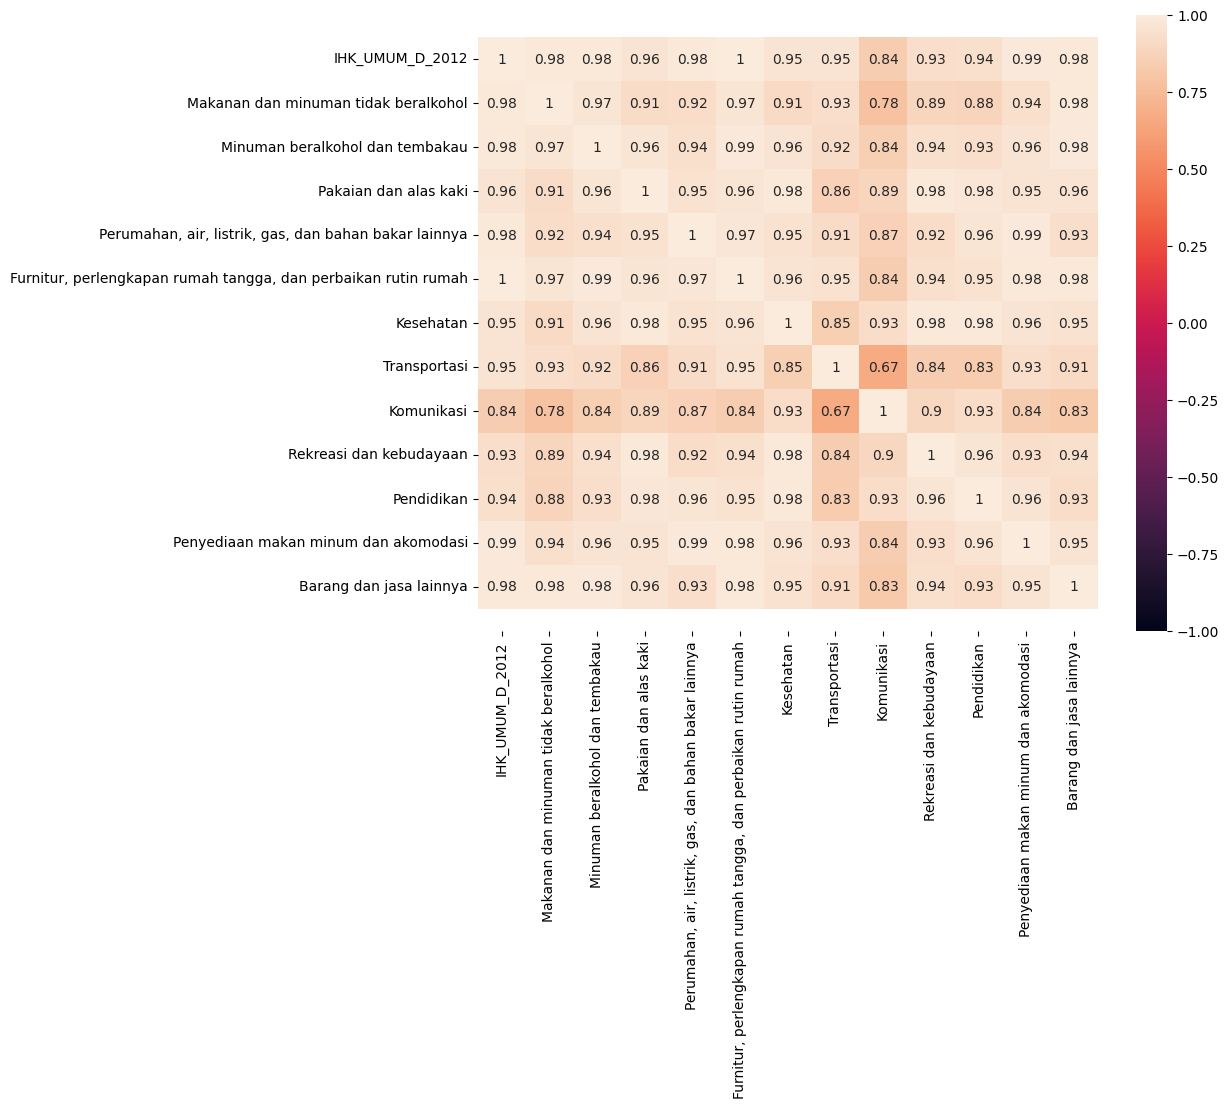

,IHK_UMUM_D_2012,Makanan dan minuman tidak beralkohol,Minuman beralkohol dan tembakau,Pakaian dan alas kaki,"Perumahan, air, listrik, gas, dan bahan bakar lainnya","Furnitur, perlengkapan rumah tangga, dan perbaikan rutin rumah",Kesehatan,Transportasi,Komunikasi,Rekreasi dan kebudayaan,Pendidikan,Penyediaan makan minum dan akomodasi,Barang dan jasa lainnya
IHK_UMUM_D_2012,1.000000,0.978609,0.981891,0.956504,0.977493,0.995540,0.954272,0.954237,0.836590,0.933948,0.943024,0.985507,0.977674
Makanan dan minuman tidak beralkohol,0.978609,1.000000,0.968727,0.914459,0.922370,0.968225,0.910988,0.933907,0.783312,0.889881,0.881469,0.937531,0.976639
Minuman beralkohol dan tembakau,0.981891,0.968727,1.000000,0.963309,0.941911,0.989113,0.957995,0.920227,0.843813,0.939805,0.933476,0.956985,0.984806
Pakaian dan alas kaki,0.956504,0.914459,0.963309,1.000000,0.945435,0.963511,0.978678,0.864902,0.888693,0.980361,0.975549,0.953156,0.958697
"Perumahan, air, listrik, gas, dan bahan bakar lainnya",0.977493,0.922370,0.941911,0.945435,1.000000,0.973607,0.950244,0.914355,0.866432,0.922038,0.964437,0.989988,0.934965
"Furnitur, perlengkapan rumah tangga, dan perbaikan rutin rumah",0.995540,0.968225,0.989113,0.963511,0.973607,1.000000,0.960366,0.948292,0.838396,0.944000,0.945786,0.984331,0.981623
Kesehatan,0.954272,0.910988,0.957995,0.978678,0.950244,0.960366,1.000000,0.845318,0.925131,0.980709,0.981761,0.956816,0.952787
Transportasi,0.954237,0.933907,0.920227,0.864902,0.914355,0.948292,0.845318,1.000000,0.666684,0.836946,0.828871,0.934423,0.913391
Komunikasi,0.836590,0.783312,0.843813,0.888693,0.866432,0.838396,0.925131,0.666684,1.000000,0.896010,0.928030,0.838150,0.826140
Rekreasi dan kebudayaan,0.933948,0.889881,0.939805,0.980361,0.922038,0.944000,0.980709,0.836946,0.896010,1.000000,0.961242,0.933731,0.942860


In [5]:
import seaborn as sns
#correlation between the values
corr = df.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [6]:
df = pd.read_csv("data.csv")


In [7]:
X = df[[ 'Makanan dan minuman tidak beralkohol',
       'Minuman beralkohol dan tembakau', 'Pakaian dan alas kaki',
       'Perumahan, air, listrik, gas, dan bahan bakar lainnya']]
Y = df[[ 'IHK_UMUM_D_2012']]
factor = 0.8
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [ ]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (122, 4)
y_train (122, 1)
X_test (31, 4)
y_test (31, 1)


/home/kevinpnjt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 15446.8779 - val_loss: 20138.7695
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 15436.7090 - val_loss: 20123.8867
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 15425.6934 - val_loss: 20107.6992
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 15413.0322 - val_loss: 20092.7852
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 15401.9473 - val_loss: 20076.3633
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 15389.9082 - val_loss: 20058.2969
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - loss: 15376.7090 - val_loss: 20038.7930
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - loss: 15362.1885 - val_loss: 20017.2930
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 15345.9434 - val_loss: 19993.0391
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 15327.4746 - val_loss: 19965.0391
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 15306.9873 -

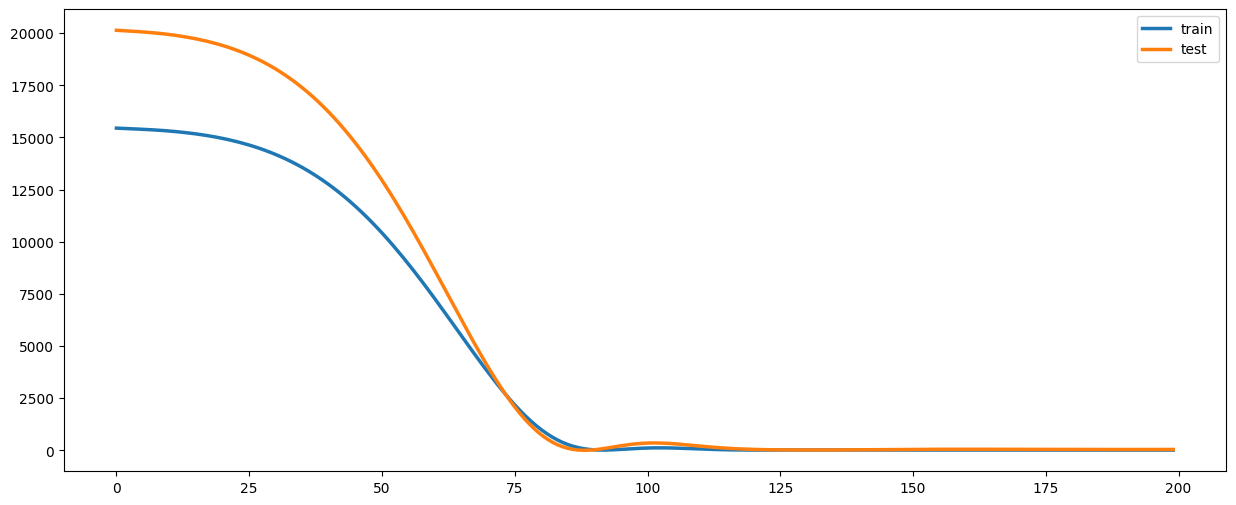

In [9]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
history = classifier.fit(X_train, Y_train, batch_size = 1000, epochs = 200, validation_split=0.001)
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [10]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
# testScore = classifier.evaluate(X_test, Y_test, verbose=0)
# print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 10.12 MSE (3.18 RMSE)


In [11]:
from sklearn.metrics import mean_absolute_percentage_error
trainScore = mean_absolute_percentage_error(Y_train, classifier.predict(X_train))
print('Train Score: %.2f MAPE' % trainScore)
testScore = mean_absolute_percentage_error(Y_test, classifier.predict(X_test))
print('Test Score: %.2f MAPE' % testScore)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Train Score: 0.02 MAPE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Test Score: 0.05 MAPE


In [12]:
predictions = classifier.predict(X_test)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[150.26591],
       [151.98564],
       [152.84807],
       [155.36107],
       [157.22992],
       [155.62054],
       [155.23695],
       [154.8824 ],
       [154.40793],
       [156.53786],
       [157.9658 ],
       [158.33128],
       [158.13493],
       [158.86223],
       [160.45383],
       [161.01208],
       [161.61464],
       [161.34132],
       [161.80443],
       [162.2363 ],
       [163.15657],
       [163.80836],
       [164.95259],
       [165.27185],
       [166.16188],
       [166.89548],
       [167.29926],
       [167.03474],
       [166.40536],
       [166.52255],
       [166.53935]], dtype=float32)

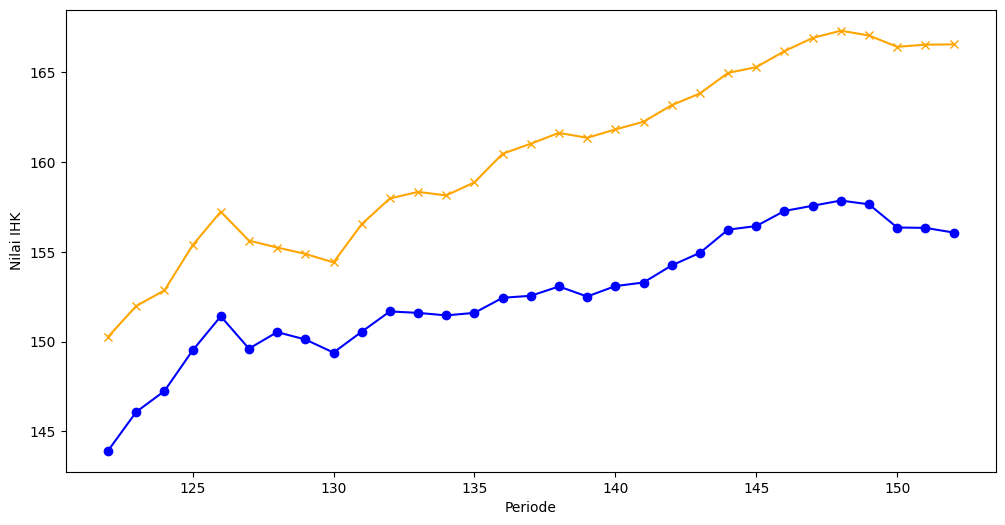

In [13]:
import matplotlib.pyplot as plt
index = range(122, len(predictions) + 122)
plt.figure(figsize=(12, 6))
plt.plot(index,predictions, label='Data prediksi',color='orange', marker='x')
plt.plot(index,Y_test,color='blue', label='Read values for the stock',marker='o')
plt.xlabel('Periode')
plt.ylabel('Nilai IHK')
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_percentage_error
trainScore = mean_absolute_percentage_error(Y_test, predictions)
print('Train Score: %.2f MAPE' % trainScore)

Train Score: 0.05 MAPE


In [19]:
from sklearn.metrics import mean_squared_error

# Hitung MSE
mse = mean_squared_error( predictions,Y_test)
print('MSE: %.2f MSE' % trainScore)

MSE: 0.05 MSE


In [16]:
from sklearn.metrics import mean_squared_error
# Hitung RMSE (akar kuadrat dari MSE)
rmse = np.sqrt(mse)

print('Train Score: %.2f RMSE' % rmse)

Train Score: 7.85 RMSE


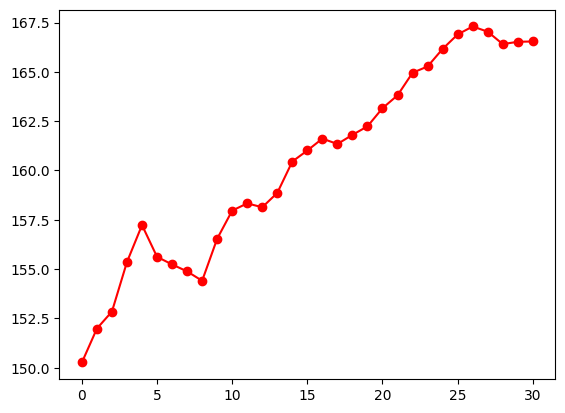

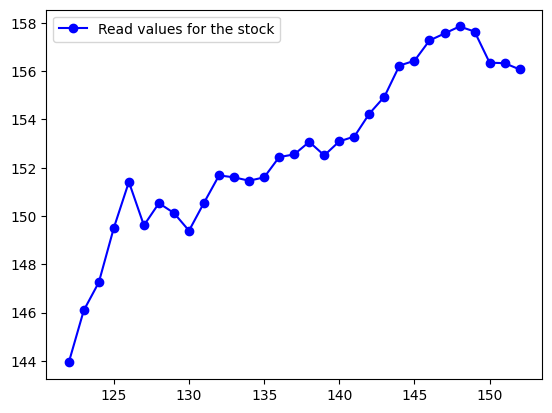

In [17]:
import matplotlib.pyplot as plt

# Asumsikan predictions dan Y_test adalah array yang panjangnya sama
# Membuat indeks dari 1 sampai 30
index = range(1, 31)

# Plot predictions
plt.plot( predictions, color='red', label='Predictions from the trained model', marker='o')
plt.show()
# Plot Y_test
plt.plot( Y_test, color='blue', label='Read values for the stock', marker='o')

# Menampilkan legenda hanya sekali setelah kedua plot
plt.legend(loc='upper left')

# Menampilkan grafik
plt.show()
